## Objectives

* Analyze the clusters found from different perspectives
* Explore different hypotheses from the clusters to try to generate insights 
* Finally, the model deployment :)

# 9.0 Cluster Analysis

## 9.1 Visual Inspection - Metrics

In [ ]:
# Evaluating Silhouette Score
silhouette_score(df_tree, labels)

0.61553115

For n_clusters = 12 the average silhouette_score is : 0.6155


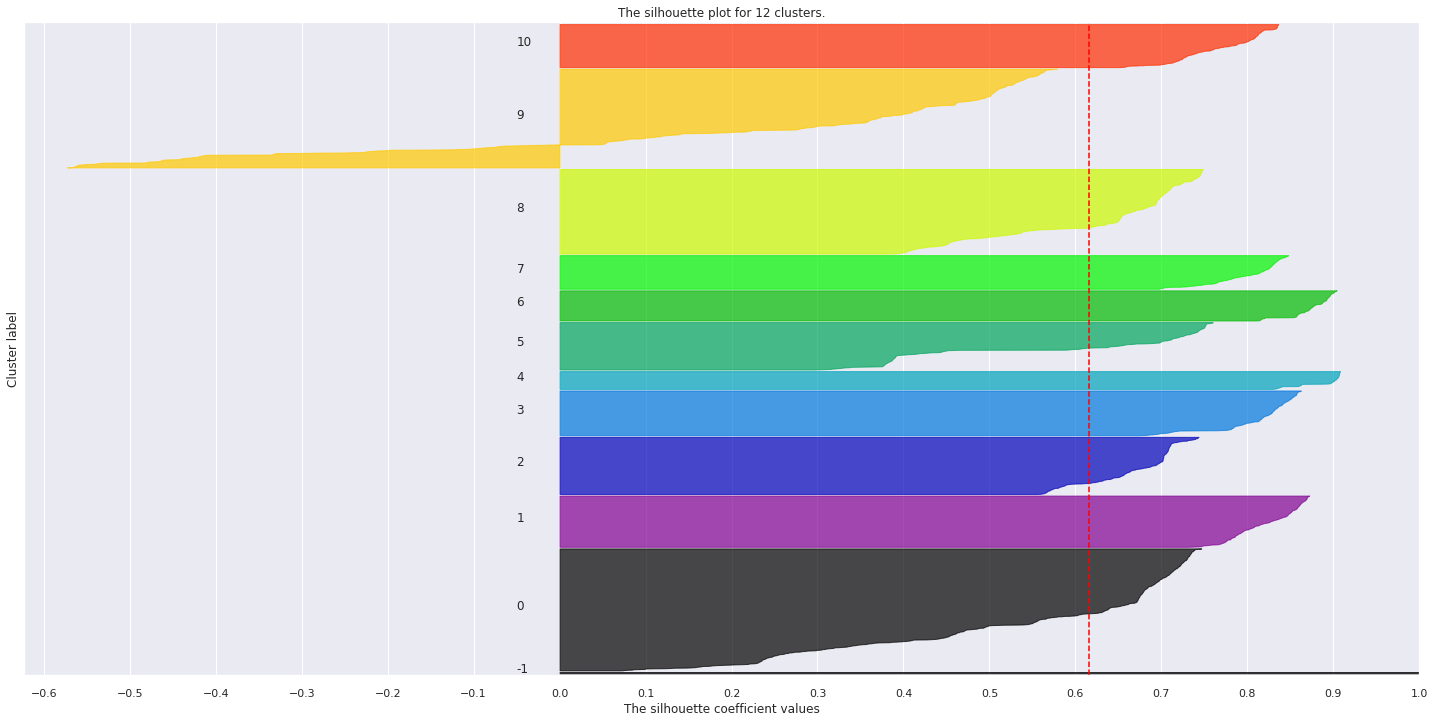

In [ ]:
plot_silhouette(df_tree, labels);

## 9.2 Pairploting Features

In [ ]:
# columns from pipeline
# cols = ['recency', 'num_transactions', 'frequency', 'revenue', 'avg_ticket', 'num_returns', 'date_range', 'return_revenue', 'avg_return_revenue', 'country']

# df_viz = pd.DataFrame(df_prep, columns = cols)
df_viz = pd.DataFrame(df_prep)

df_viz['cluster'] = labels
# df_viz.head()

In [ ]:
# sns.pairplot(data = df_viz, hue = 'cluster' );

## 9.3 Visual Inspection - UMAP

In [ ]:
px.scatter(data_frame = df_res, x = 'embedding_x', y = 'embedding_y', color = 'cluster', hover_data=['revenue', 'num_purchases', 'avg_ticket', 'qty_items'])

# 9.4 Business Perspective

### 9.4.1 Clusters Table

In [ ]:
# number of customers per cluster
n_cust = df_res.copy()
n_cust = n_cust.groupby('cluster').count().reset_index().rename(columns = {'customer_id' : 'num_of_customers'})
n_cust['perc_of_customer'] = n_cust['num_of_customers']/n_cust['num_of_customers'].sum()*100
n_cust = n_cust[['cluster', 'num_of_customers', 'perc_of_customer']]

In [ ]:
result

,cluster,embedding_x,embedding_y,customer_id,recency,avg_days_bw_purchases,num_purchases,tenure,frequency,revenue,avg_ticket,qty_items,avg_basket_size,avg_unique_prods,returns_revenue,avg_return_revenue,num_returns,qty_returned,num_of_customers,perc_of_customer,cluster_name
0,-1.0,15.842680,18.997217,15463.700000,140.600000,12.566667,1.500000,153.800000,0.211020,523.555000,222.903000,273.600000,121.630000,8.150000,-3.830000,-1.560000,0.400000,-0.400000,10,0.231857,NaN
1,0.0,-4.394999,6.967093,15278.091346,53.950721,60.819169,5.557692,231.489183,0.068653,1865.550998,391.758136,1091.437500,211.282558,23.052804,-36.535421,-10.411127,2.352163,-16.441106,832,19.290517,NaN
2,1.0,-1.797025,15.601501,15136.660000,33.531429,44.308566,10.340000,283.885714,0.035537,4461.278543,556.546980,2696.182857,298.446664,26.742618,-87.811886,-14.569405,5.351429,-40.151429,350,8.115001,NaN
3,2.0,-2.090486,-2.139408,15333.279487,65.510256,62.211813,4.115385,199.520513,0.040749,1080.950077,313.693952,588.584615,164.993041,20.922586,-28.824641,-8.764546,1.620513,-12.369231,390,9.042430,NaN
4,3.0,20.467571,-3.261254,15520.251634,107.924837,91.589651,2.467320,153.790850,0.041685,447.734183,196.821691,230.921569,97.567939,13.575777,-13.983072,-7.922691,0.627451,-4.006536,306,7.094830,NaN
5,4.0,0.626659,24.082491,15072.983607,22.131148,26.477405,28.081967,316.573770,0.083899,26097.278525,1041.493137,15673.311475,609.636897,19.437086,-948.464262,-105.865941,16.393443,-528.295082,122,2.828658,NaN
6,5.0,11.472853,-3.096892,15223.024691,120.250000,12.568408,1.648148,131.959877,0.051481,570.870463,373.871256,361.274691,212.864920,23.932407,-6.997685,-3.095349,0.515432,-3.253086,324,7.512173,NaN
7,6.0,5.794934,-14.285286,15352.708738,83.165049,75.144013,3.441748,186.339806,0.027701,692.939126,225.941887,334.300971,102.549806,16.564474,-30.951553,-9.668657,1.815534,-14.941748,206,4.776258,NaN
8,7.0,11.669832,-9.251874,15298.747826,101.221739,106.247246,1.913043,140.304348,0.038125,596.786348,333.535274,358.391304,184.133996,23.591615,-9.719000,-2.532902,0.760870,-4.130435,230,5.332715,NaN
9,8.0,-1.207480,-8.027779,15264.590988,94.859619,69.092988,2.124783,141.036395,0.047697,858.969965,393.956899,505.726170,220.098562,24.178264,-11.518336,-5.452502,0.748700,-4.570191,577,13.378159,NaN


In [ ]:
# calculating mean values for each cluster attribute
df_res2 = df_res.copy()

# add cluster to df
result = df_res2.groupby('cluster').mean().reset_index()
result

# add nº of customers
result = result.merge( n_cust, on = 'cluster', how = 'inner')
result.rename(columns = {'date_range' : 'tenure' }, inplace = True)
# Based on the RFM Analysis I gave names to clusters 
names = {"4" : "Insiders",
         "1" : "Potential Loyalists",
         "0" : "Loyal Customers",
         "2" : "Promissing 1",
         "8" : "Need Attention 1",
         "6" : "Promising 2",
         "7" : "Need Attention 2",
         "5" : "Hibernating 1",
         "10" : "Churn 1",
         "3" : "Price Sensitive",
         "9" : "Churn 2",
         "-1" : 'Noise' }
result['cluster_name'] = result['cluster'].map(names)

result_reduced = result[['cluster_name', 'num_of_customers', 'perc_of_customer', 'recency', 'revenue', 'avg_ticket', 'num_purchases', 'tenure', 'frequency', 'num_returns', 'avg_return_revenue' ]].copy()

#formatting output
result_reduced.sort_values('revenue', ascending = False, inplace = True )
formatter = {"perc_of_customer " : "{:.2%}",
"recency" : "{:,.2f}",
"revenue" : "{:,.2f}",
"avg_ticket" : "{:,.2f}",
"num_purchases" : "{:,.2f}",
"tenure" : "{:,.2f}",
"frequency" : "{:,.4f}",
"num_returns" : "{:,.2f}",
"avg_return_revenue" : "{:,.2f}"
}
result_reduced.style.format( formatter = formatter )


,cluster_name,num_of_customers,perc_of_customer,recency,revenue,avg_ticket,num_purchases,tenure,frequency,num_returns,avg_return_revenue
6,Insiders,122,2.828658,22.13,"26,097.28","1,041.49",28.08,316.57,0.0839,16.39,-105.87
2,Potential Loyalists,350,8.115001,33.53,"4,461.28",556.55,10.34,283.89,0.0355,5.35,-14.57
1,Loyal Customers,832,19.290517,53.95,"1,865.55",391.76,5.56,231.49,0.0687,2.35,-10.41
4,Promissing 1,390,9.042430,65.51,"1,080.95",313.69,4.12,199.52,0.0407,1.62,-8.76
10,Need Attention 1,577,13.378159,94.86,858.97,393.96,2.12,141.04,0.0477,0.75,-5.45
8,Promising 2,206,4.776258,83.17,692.94,225.94,3.44,186.34,0.0277,1.82,-9.67
3,Churn 1,294,6.816601,147.60,598.30,369.78,1.63,156.01,0.0371,0.55,-3.03
9,Need Attention 2,230,5.332715,101.22,596.79,333.54,1.91,140.30,0.0381,0.76,-2.53
7,Hibernating 1,324,7.512173,120.25,570.87,373.87,1.65,131.96,0.0515,0.52,-3.10
0,Noise,10,0.231857,140.60,523.56,222.90,1.50,153.80,0.2110,0.40,-1.56


In [ ]:
result_reduced

,cluster_name,num_of_customers,perc_of_customer,recency,revenue,avg_ticket,num_purchases,tenure,frequency,num_returns,avg_return_revenue
6,Insiders,122,2.828658,22.131148,26097.278525,1041.493137,28.081967,316.573770,0.083899,16.393443,-105.865941
2,Potential Loyalists,350,8.115001,33.531429,4461.278543,556.546980,10.340000,283.885714,0.035537,5.351429,-14.569405
1,Loyal Customers,832,19.290517,53.950721,1865.550998,391.758136,5.557692,231.489183,0.068653,2.352163,-10.411127
4,Promissing 1,390,9.042430,65.510256,1080.950077,313.693952,4.115385,199.520513,0.040749,1.620513,-8.764546
10,Need Attention 1,577,13.378159,94.859619,858.969965,393.956899,2.124783,141.036395,0.047697,0.748700,-5.452502
8,Promising 2,206,4.776258,83.165049,692.939126,225.941887,3.441748,186.339806,0.027701,1.815534,-9.668657
3,Churn 1,294,6.816601,147.602041,598.298061,369.778006,1.625850,156.010204,0.037078,0.551020,-3.026678
9,Need Attention 2,230,5.332715,101.221739,596.786348,333.535274,1.913043,140.304348,0.038125,0.760870,-2.532902
7,Hibernating 1,324,7.512173,120.250000,570.870463,373.871256,1.648148,131.959877,0.051481,0.515432,-3.095349
0,Noise,10,0.231857,140.600000,523.555000,222.903000,1.500000,153.800000,0.211020,0.400000,-1.560000


### 9.4.2 RFM Clusters Visualization

In [ ]:
# Based on the RFM Analysis I gave names to clusters 

px_result = result.copy()
px_result['recency'] = - px_result['recency'] 

# px_result.groupby('cluster')


# px_result['cluster_names'] = px_result['cluster'].map(names)
px_result['log_revenue'] = np.log10(px_result['revenue'])#/np.log10(1000)
# np.exp()

px.scatter(data_frame = px_result, x = 'recency', y = 'frequency', size = 'log_revenue', color = 'cluster_names', hover_data=['revenue', 'num_purchases', 'avg_ticket' ] )  #, hover_data=['revenue', 'num_purchases', 'avg_ticket', 'qty_items']

### 9.4.3 Clusters Report

In [ ]:
# Generating a report of some attributes for each cluster

# ordering by cluster
result = result.sort_values('cluster').reset_index(drop = True)

for i in range( len(np.unique(labels)) ):
    print('Cluster {}: "{}"'.format(result.loc[i, 'cluster'], result.loc[i, 'cluster_name']))
    print(' - Number of customers {} ({:,.2f} % of total)'.format(result.loc[i, 'num_of_customers'], result.loc[i, 'perc_of_customer']) )
    print(' - Average nº of purchases: {:.2f} '.format(result.loc[i, 'num_purchases']) )
    print(' - Average amount spent in total ${:,.2f} '.format(result.loc[i, 'revenue']) )
    print(' - Mean values for average ticket ${:,.2f} '.format(result.loc[i, 'avg_ticket']) )
    print(' - Average Recency (days) {:,.2f} \n'.format(result.loc[i, 'tenure']) )

Cluster -1: "Noise"
 - Number of customers 10 (0.23 % of total)
 - Average nº of purchases: 1.50 
 - Average amount spent in total $523.56 
 - Mean values for average ticket $222.90 
 - Average Recency (days) 153.80 

Cluster 0: "Loyal Customers"
 - Number of customers 832 (19.29 % of total)
 - Average nº of purchases: 5.56 
 - Average amount spent in total $1,865.55 
 - Mean values for average ticket $391.76 
 - Average Recency (days) 231.49 

Cluster 1: "Potential Loyalists"
 - Number of customers 350 (8.12 % of total)
 - Average nº of purchases: 10.34 
 - Average amount spent in total $4,461.28 
 - Mean values for average ticket $556.55 
 - Average Recency (days) 283.89 

Cluster 10: "Churn 1"
 - Number of customers 294 (6.82 % of total)
 - Average nº of purchases: 1.63 
 - Average amount spent in total $598.30 
 - Mean values for average ticket $369.78 
 - Average Recency (days) 156.01 

Cluster 2: "Promissing 1"
 - Number of customers 390 (9.04 % of total)
 - Average nº of purchas

### 9.4.4 Suggested Business Levers

| Cluster | Name | Action Plan  |
|-|-|-|
| 4 | Insiders | Keep engaged, offer concierge  |
| 1 | Potential Loyalists | Increase purchase frequency  |
| 0 | Loyal Customers | Increase average ticket  |
| 2 | Promissing 1 | Increase frequency  |
| 8 | Need Attention 1 | Decrease recency  |
| 6 | Promising 2 | Increase avg ticket  |
| 7 | Need Attention 2 | Increase avg ticket |
| 5 | Hibernating 1| Make them buy again |
| 10 | Churn 1 |Make them buy again |
| 3 | Price Sensitive | Increase avg ticket, Show more promos |
| -1 | Noise | Ignore |
| 9 | Churn 2 | Do nothing |

# 10.0. Cluster EDA and Business Hypothesis/Insights

## 10.1. Hypothesis Mind Map

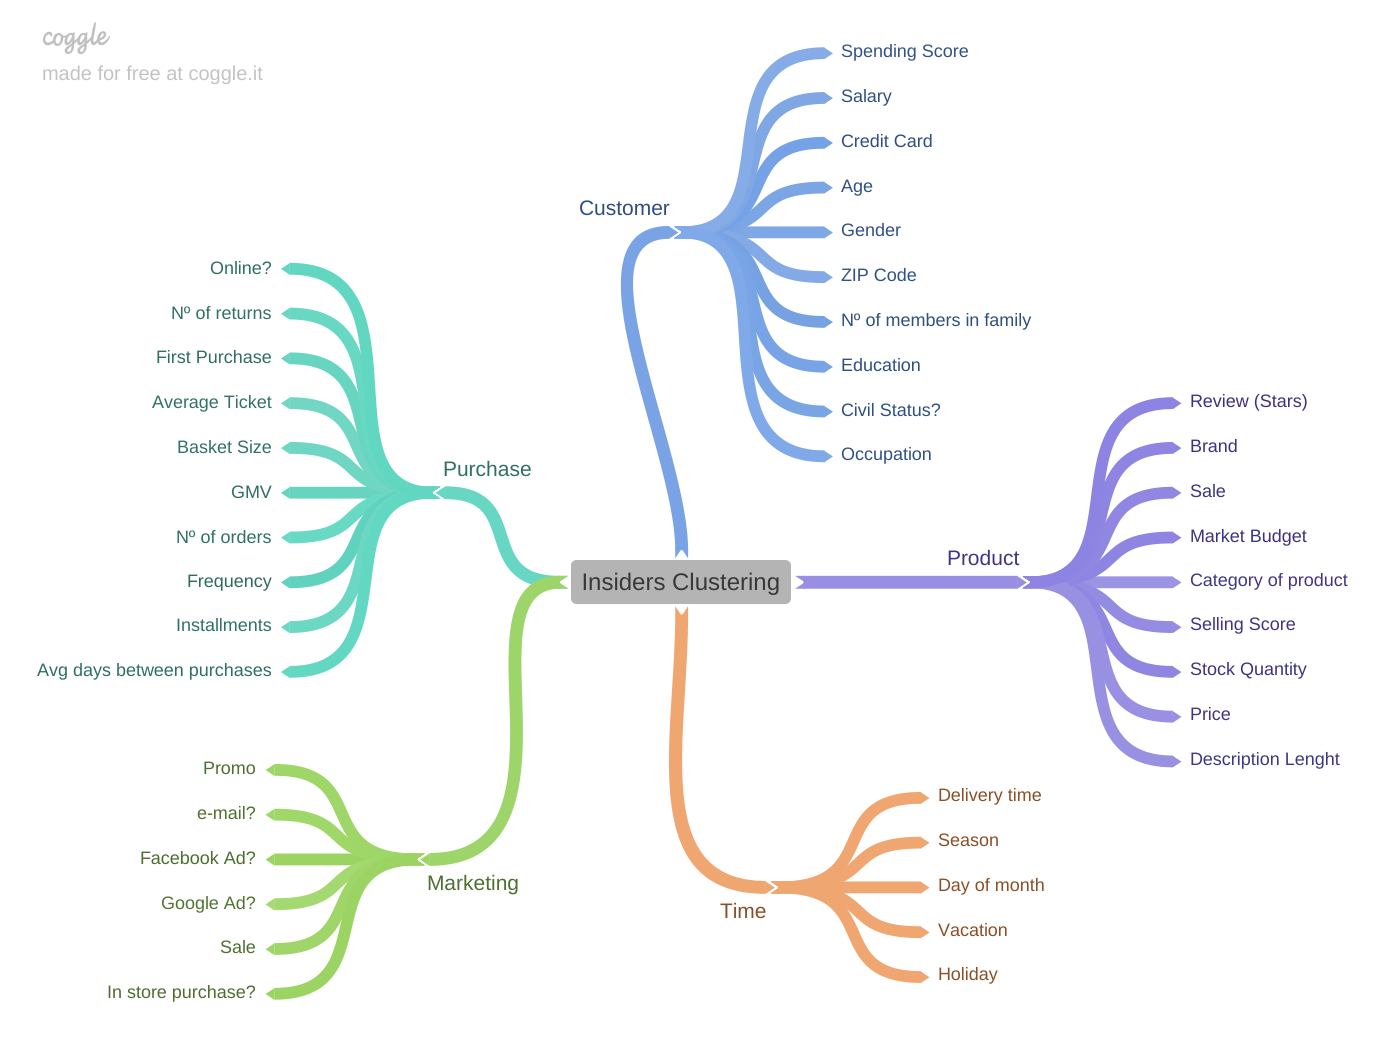

In [ ]:
Image('../reports/figures/Insiders_Clustering.png')

## 10.2. Business Hypothesis

Business Hypothesis:
- Customers who buy more products return less
- **Return rates are higher than average for cheaper products**
- Customers with higher basket sizes buy less products in quantity
- **Customers buy more near holidays**
- **Customers buy more on the first half of the month**
- **Customers from Insiders Program are responsible for 20% of revenue**
- **Customers from Insiders Program buy a 30% more products in quantity than the average customer**

### H1- Return rates are higher than average for cheaper products
**False** There is no evidence to support there is difference in return rates with respect to different prices.

The only evidence we have is a weak positive correlation which indicates the oposite.

In [ ]:
# creating some auxiliary dataset

# counting number of times a product was returned
df_aux1 = df_returns.copy()
df_aux1 = df_aux1.groupby('stock_code').count().reset_index()[['stock_code', 'quantity']].copy()

# geting unit price
df_aux2 = df_returns[['stock_code', 'unit_price']].copy()
df_aux2 = df_aux2.drop_duplicates('stock_code')

# merging results
df_aux3 = pd.merge( left = df_aux1, right = df_aux2, on = 'stock_code', how = 'left' )
df_aux3.rename(columns = {'quantity': 'quantity returned'}, inplace = True)
df_aux3['avg'] = df_aux3['unit_price'].apply( lambda x: 'above' if x > df_aux3['unit_price'].mean() else 'below')
df_aux3['median'] = pd.qcut( df_aux3['unit_price'], q = 2, labels = ['below', 'above'] )
# df_aux3.head()

The Spearman correlation coefficient is: 0.2232
The associated p-value is: 0.0000


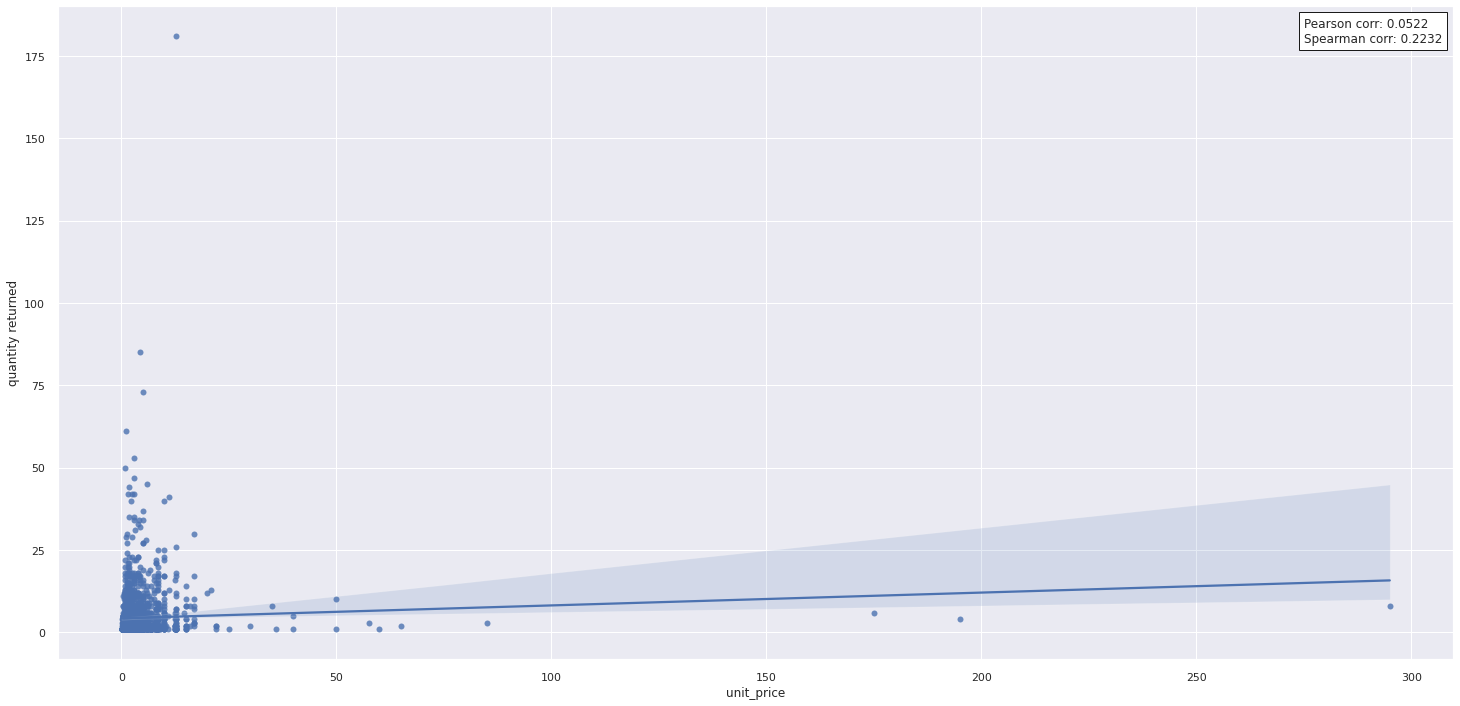

In [ ]:
# ploting correlation between price and n/returns
fig, ax = plt.subplots()
sns.regplot(data = df_aux3, y = 'quantity returned', x = 'unit_price', ax = ax); # default ci = 95

# correlations
pearson = df_aux3.corr(method = 'pearson').iloc[0,1]
spearman = df_aux3.corr(method = 'spearman').iloc[0,1]

anchored_text = AnchoredText( "Pearson corr: {:.4f} \nSpearman corr: {:.4f}".format(pearson, spearman), loc=1)
ax.add_artist(anchored_text);

# calculatin p-value for the Spearman correlation coefficient
x = df_aux3['unit_price'] 
y = df_aux3['quantity returned'] 
_, p_value = st.spearmanr(x, y)
print('The Spearman correlation coefficient is: {:.4f}\nThe associated p-value is: {:.4f}'.format(spearman, p_value) )

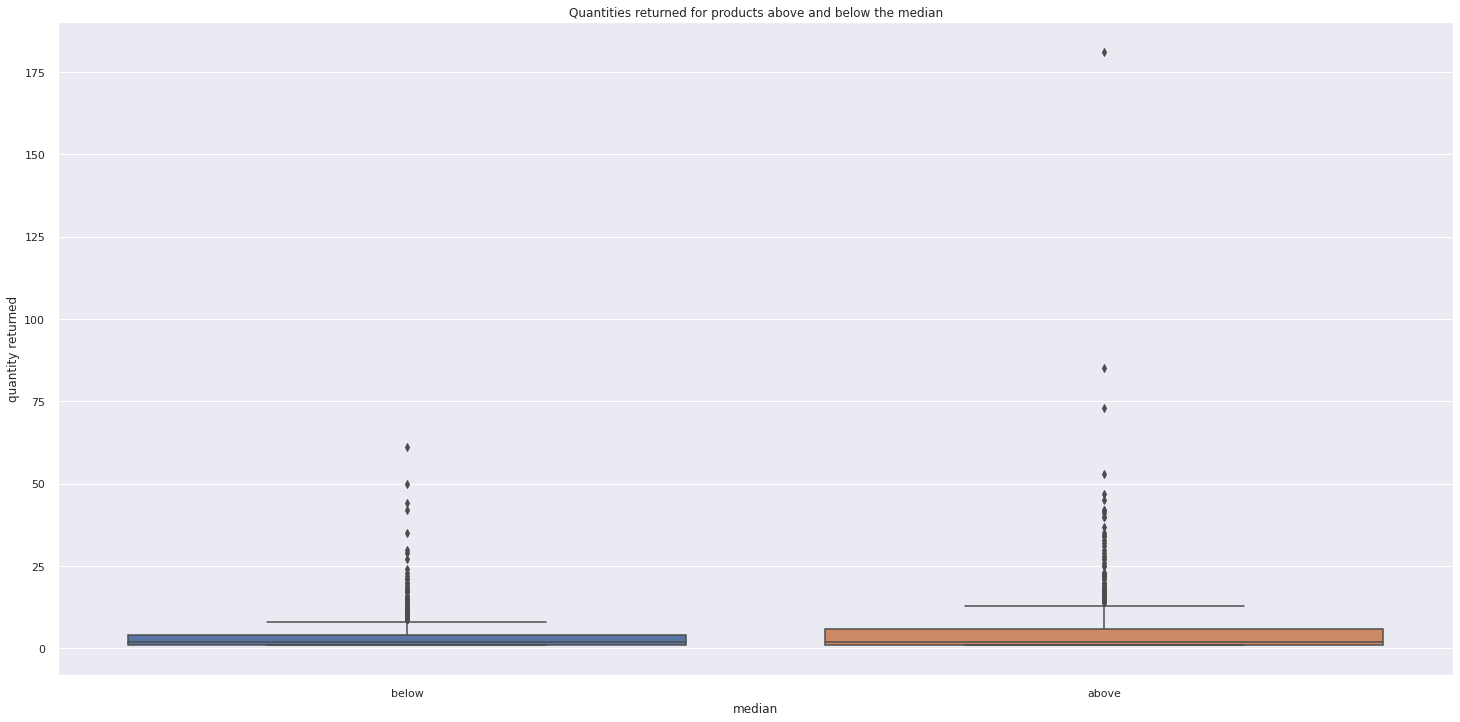

In [ ]:
plt.title('Quantities returned for products above and below the median')
sns.boxplot(data = df_aux3, y = 'quantity returned', x = 'median', showfliers = True);

### H2 - Customers who buy more items are the ones that return less
**False** One of the highest return rates are from "promissing" and "price sensitive" customers. Even though, in absolute terms, this hypothesis would be true for "Insiders" customers.


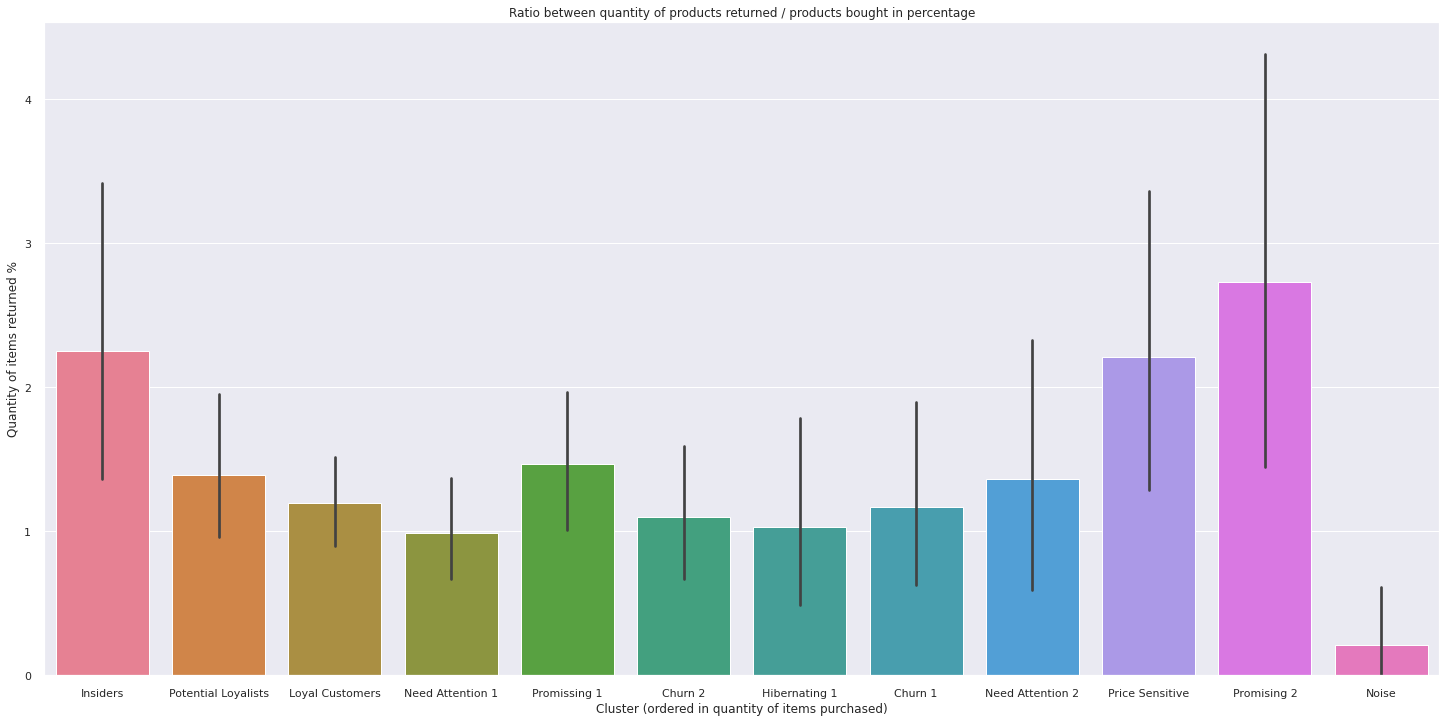

In [ ]:
# since in absolute terms Insiders have the highest quantities of returns, we'll do a comparative analysis to put everyone on the same scale
df_aux4 = df_res.copy()
df_aux4['cluster_name'] = df_aux4['cluster'].map(names)

# qty returned / qty bought
df_aux4['qty_return_rate_%'] = -df_aux4['qty_returned'] / df_aux4['qty_items'] * 100

# revenue lost from returns / net revenue
df_aux4['returns_revenue_ratio'] = -df_aux4['returns_revenue'] / df_aux4['revenue']

# removing customers that should not be logged (remember to remove this in the future)
df_aux4 = df_aux4.loc[ (df_aux4['qty_return_rate_%'] <= 100) & (df_aux4['returns_revenue_ratio'] <= 1) ]

# ordering clusters from highest quantities bough to lowest
qty_ordered = list(df_aux4.groupby('cluster_name').sum().reset_index().sort_values('qty_items', ascending = False)['cluster_name'])

sns.barplot(data = df_aux4, x = 'cluster_name', y = 'qty_return_rate_%', order = qty_ordered, palette = 'husl');
plt.title('Ratio between quantity of products returned / products bought in percentage')
plt.ylabel('Quantity of items returned %')
plt.xlabel('Cluster (ordered in quantity of items purchased)');

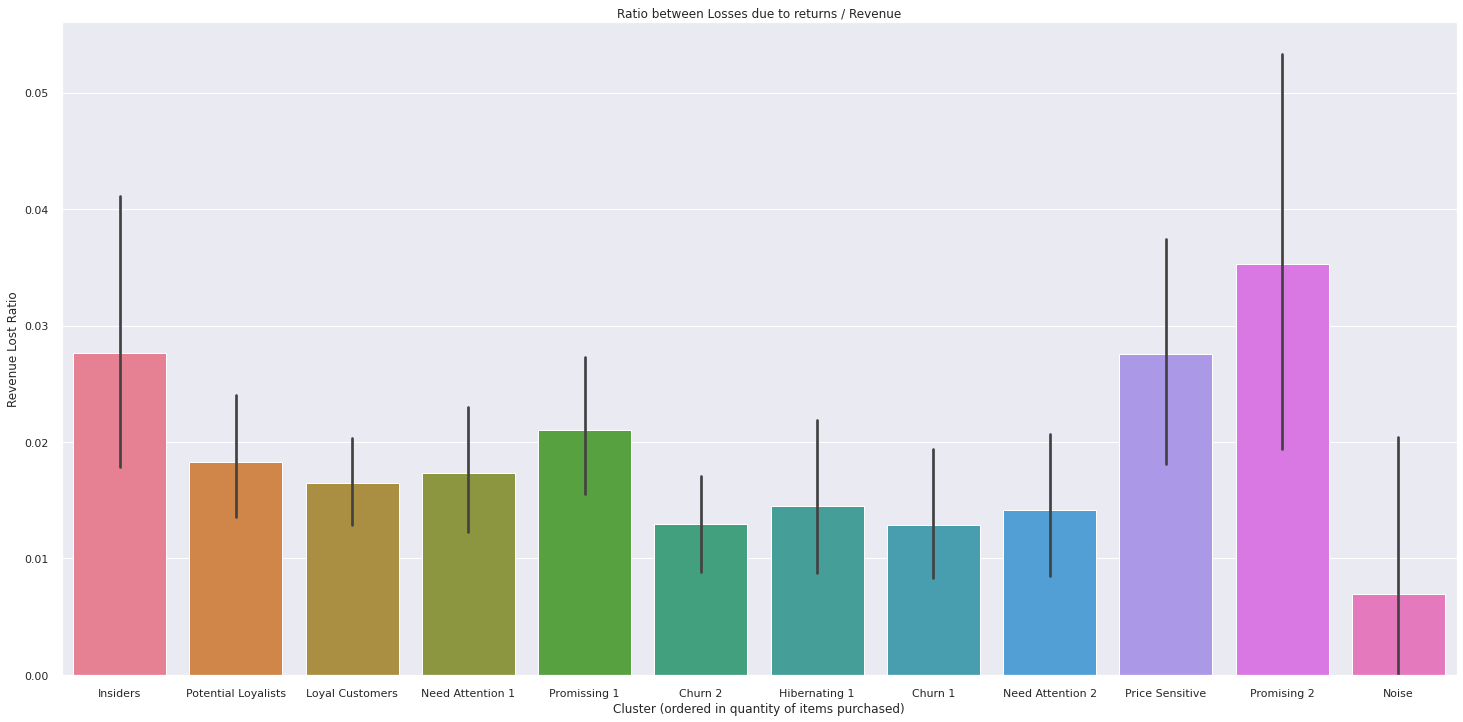

In [ ]:
sns.barplot(data = df_aux4, x = 'cluster_name', y = 'returns_revenue_ratio', order = qty_ordered, palette = 'husl');
plt.title('Ratio between Losses due to returns / Revenue')
plt.ylabel('Revenue Lost Ratio')
plt.xlabel('Cluster (ordered in quantity of items purchased)');

### H3 - Customers buy 10% more on the first half of the month

**False** There is no significant difference between gross revenue on first and second halfs of the month

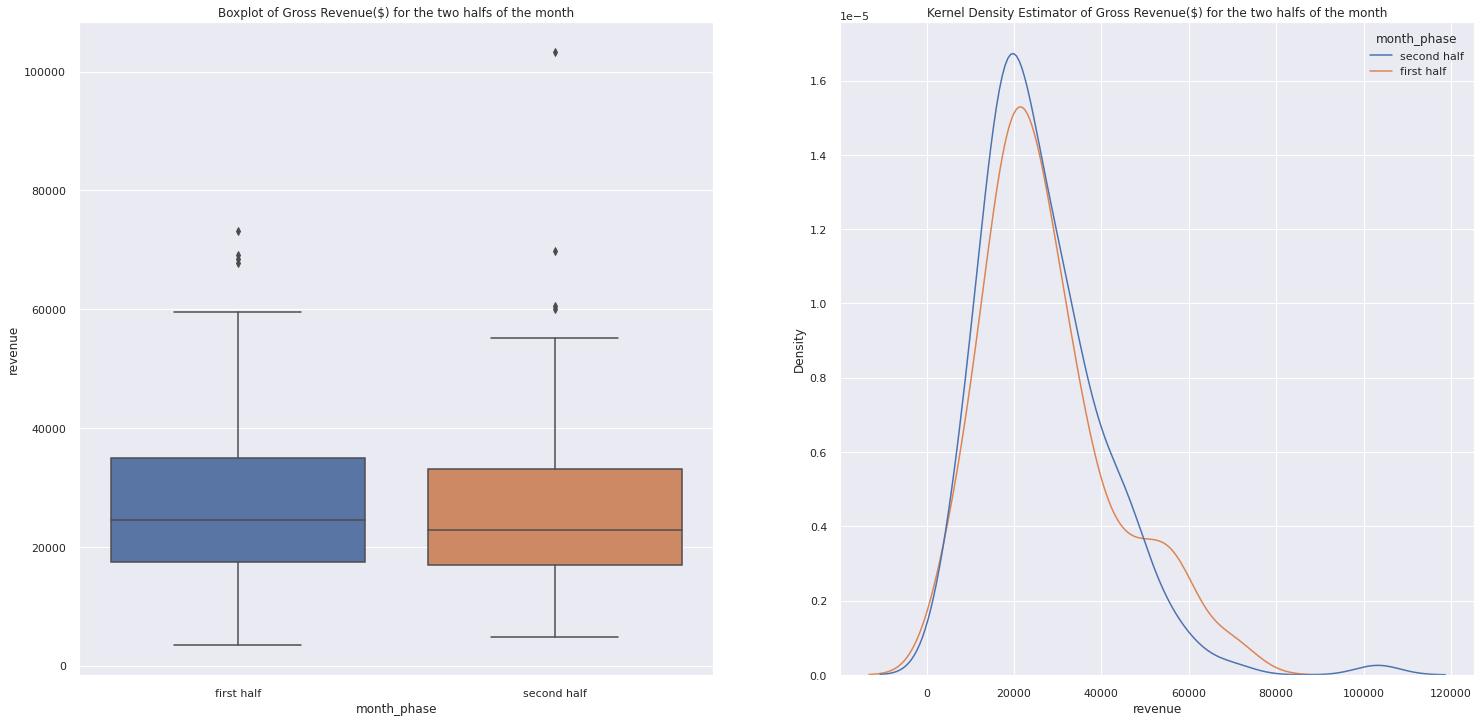

In [ ]:
# date
df_date = df3.copy()
df_date['revenue'] = df_date['quantity'] * df_date['unit_price']
df_date = df_date.groupby('invoice_date').sum().reset_index()
df_date['month'] = df_date['invoice_date'].dt.month
df_date['month_phase'] = df_date['invoice_date'].apply( lambda x: 'first half' if x.day <=14 else 'second half')
df_date.head()

# Ploting comparisons
fig, ax = plt.subplots(1,2)

sns.boxplot(data = df_date, y = 'revenue', x = 'month_phase', ax = ax[0], order = ['first half', 'second half'] );
sns.kdeplot(data = df_date, x = 'revenue', hue = 'month_phase' , ax = ax[1] );
ax[0].set_title('Boxplot of Gross Revenue($) for the two halfs of the month')
ax[1].set_title('Kernel Density Estimator of Gross Revenue($) for the two halfs of the month')

plt.show()

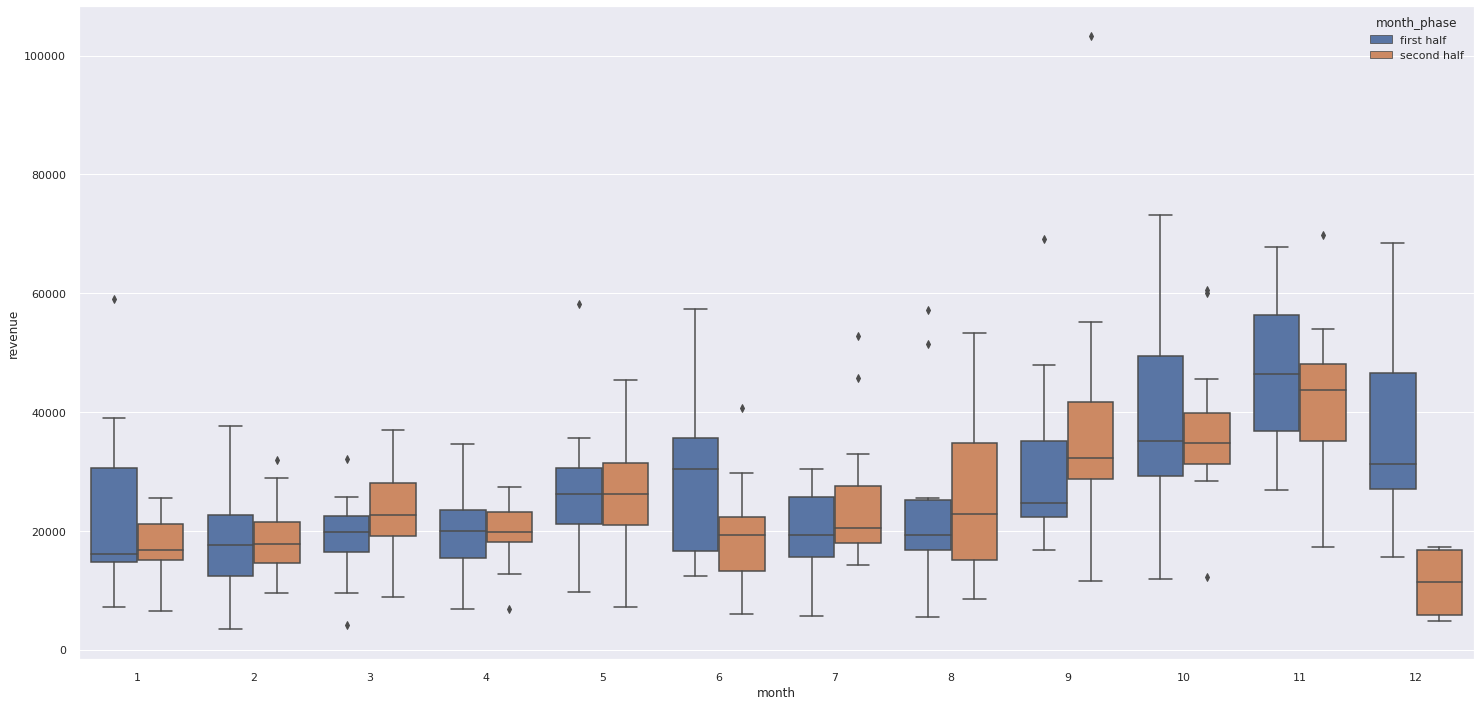

In [ ]:
# ploting comparison monthly
sns.boxplot(data = df_date, x = 'month', y = 'revenue', hue = 'month_phase', hue_order = ['first half', 'second half'] );

In [ ]:
# defining two samples to test
first = df_date.loc[ df_date['month_phase'] == 'first half', 'revenue' ]
second = df_date.loc[ df_date['month_phase'] != 'first half', 'revenue' ]

print( "Mean of sample a: {:,.2f}. Median of sample a: {:,.2f}".format(first.mean(), first.median()) )
print( "Mean of sample b: {:,.2f}. Median of sample b: {:,.2f}".format(second.mean(), second.median()) )

print(st.normaltest(first))
print(st.normaltest(second))

Mean of sample a: 27,912.68. Median of sample a: 24,446.49
Mean of sample b: 26,477.52. Median of sample b: 22,810.00
NormaltestResult(statistic=18.41681031717881, pvalue=0.00010019370871206997)
NormaltestResult(statistic=62.30489657113296, pvalue=2.9557221882645036e-14)


We see that both distributions are not normal. Therefore testing the difference between means (using a t-test) is inappropriate. 

With this in mind, we'll do a Mann-Whitney U test:

In [ ]:
# conducting a Mann-Whitney U test:
print(st.mannwhitneyu(first, second))

# Interestingly even with the requirement of normality not respected, the t test would yield a similar result
# print(st.ttest_ind(first, second, equal_var = False, alternative = 'two-sided'))

MannwhitneyuResult(statistic=12216.0, pvalue=0.4407692017323115)


The p-value for the test is 0.44 (<0.05). Therefore we do not reject the null hypothesis of equality of medians.

In [ ]:
# feature to be tested
x = np.array(df_date['revenue'])

# number of observations from group a (first half of the month)
n_a = len(first)

# number of times to repeat the test
p = 10000

# differences observed in permutation test
diffs = permutation_test(x, n_a, p, 'mean')

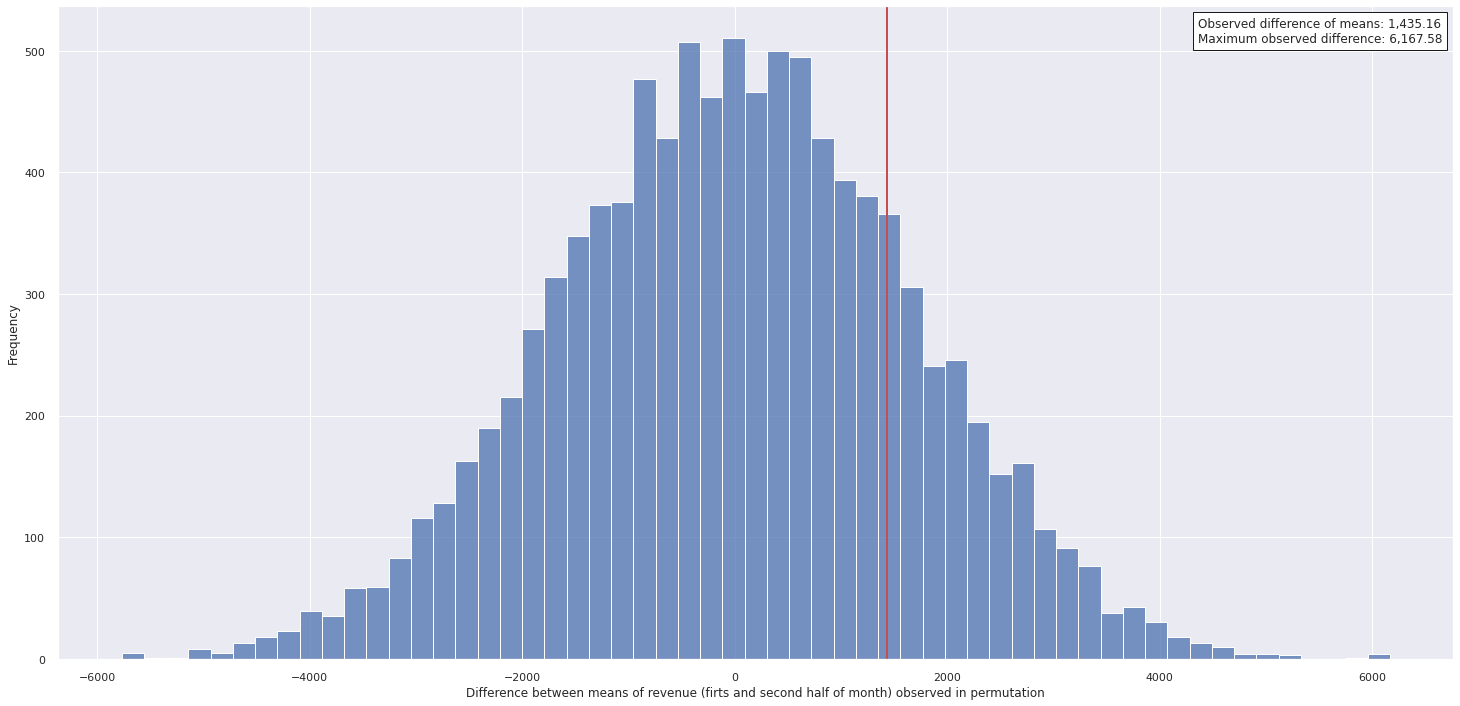

In [ ]:
# calculating observed differences in data
first = df_date.loc[ df_date['month_phase'] == 'first half', 'revenue' ]
second = df_date.loc[ df_date['month_phase'] != 'first half', 'revenue' ]

diff_means = first.mean() - second.mean()
diff_medians = first.median() - second.median() 
max_obs = np.max(diffs)

fig, ax = plt.subplots()

sns.histplot(diffs, ax = ax);

ax.set_xlabel('Difference between means of revenue (firts and second half of month) observed in permutation')
ax.set_ylabel('Frequency');
ax.axvline(diff_means, lw = 2, color = 'r');
anchored_text = AnchoredText( "Observed difference of means: {:,.2f}\nMaximum observed difference: {:,.2f}"
                               .format(diff_means, max_obs), loc = 'upper right' )
ax.add_artist(anchored_text);

### H4 - Customers from Insiders Program are responsible for 20% of revenue
**False** These customers generate about 40% of the total revenue

In [ ]:
# defining dataset with cluster names
# names = {"4" : "Insiders", "1" : "Potential Loyalists", "0" : "Loyal Customers", "2" : "Promissing 1", "8" : "Need Attention 1", "6" : "Promising 2", "7" : "Need Attention 2", "5" : "Hibernating 1", "10" : "Churn 1", "3" : "Price Sensitive", "9" : "Churn 2", "11" : "Hibernating 2", "-1" : 'Noise' }

df_result['cluster_name'] = df_result['cluster'].map(names)

# summing revenue by cluster
df_agg = df_result[['cluster_name', 'revenue']].copy()
df_agg = df_agg.groupby('cluster_name').sum().reset_index()

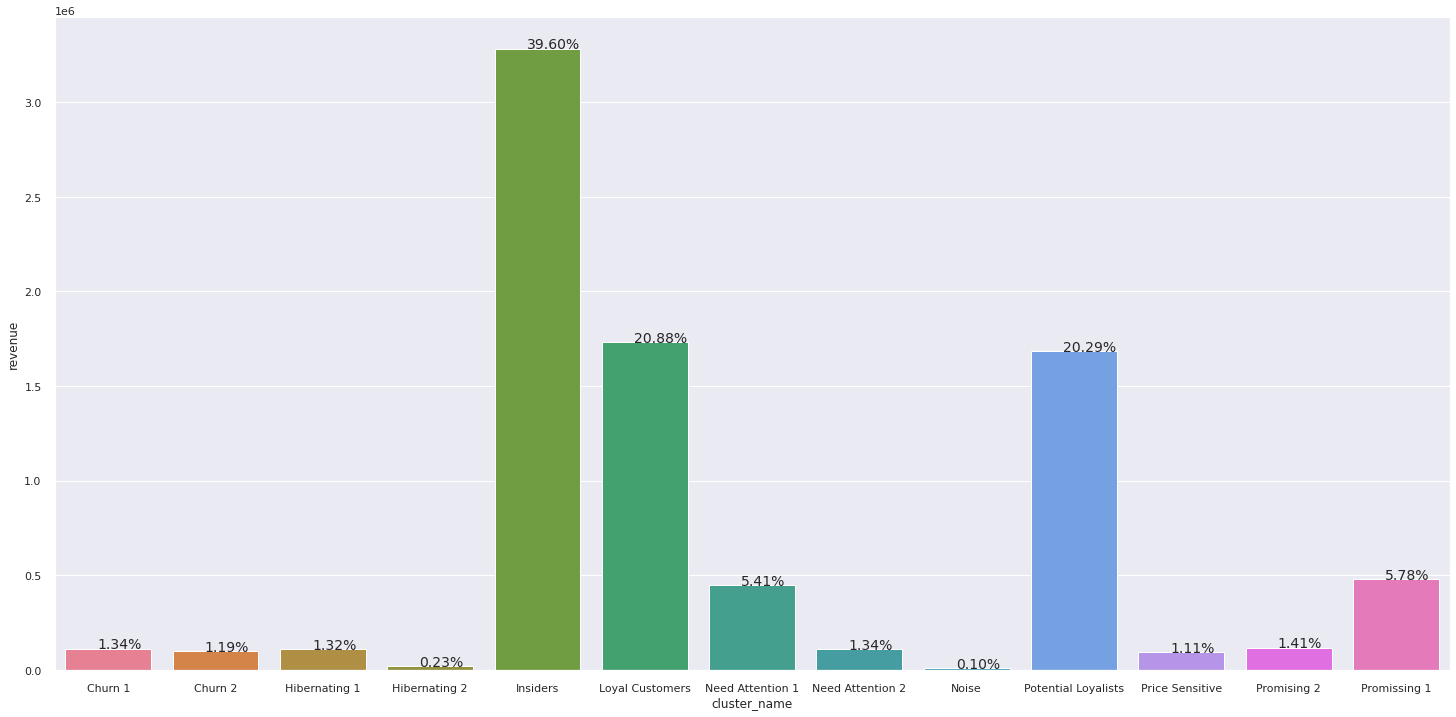

In [ ]:
# ploting the results
bar = sns.barplot(data = df_agg, x = 'cluster_name', y = 'revenue', palette = 'husl');

bar_order = list(df_agg['cluster_name'].unique())
spots = zip(bar.patches, bar_order)
for spot in spots:
    total = df_agg['revenue'].sum()
    class_total = df_agg[df_agg['cluster_name'] == spot[1]]['revenue']
    
    percent = float(class_total/total*100)

    height = spot[0].get_height()
    bar.text(spot[0].get_x()+0.3, height+5, '{:.2f}%'.format(percent), fontsize = 14 )


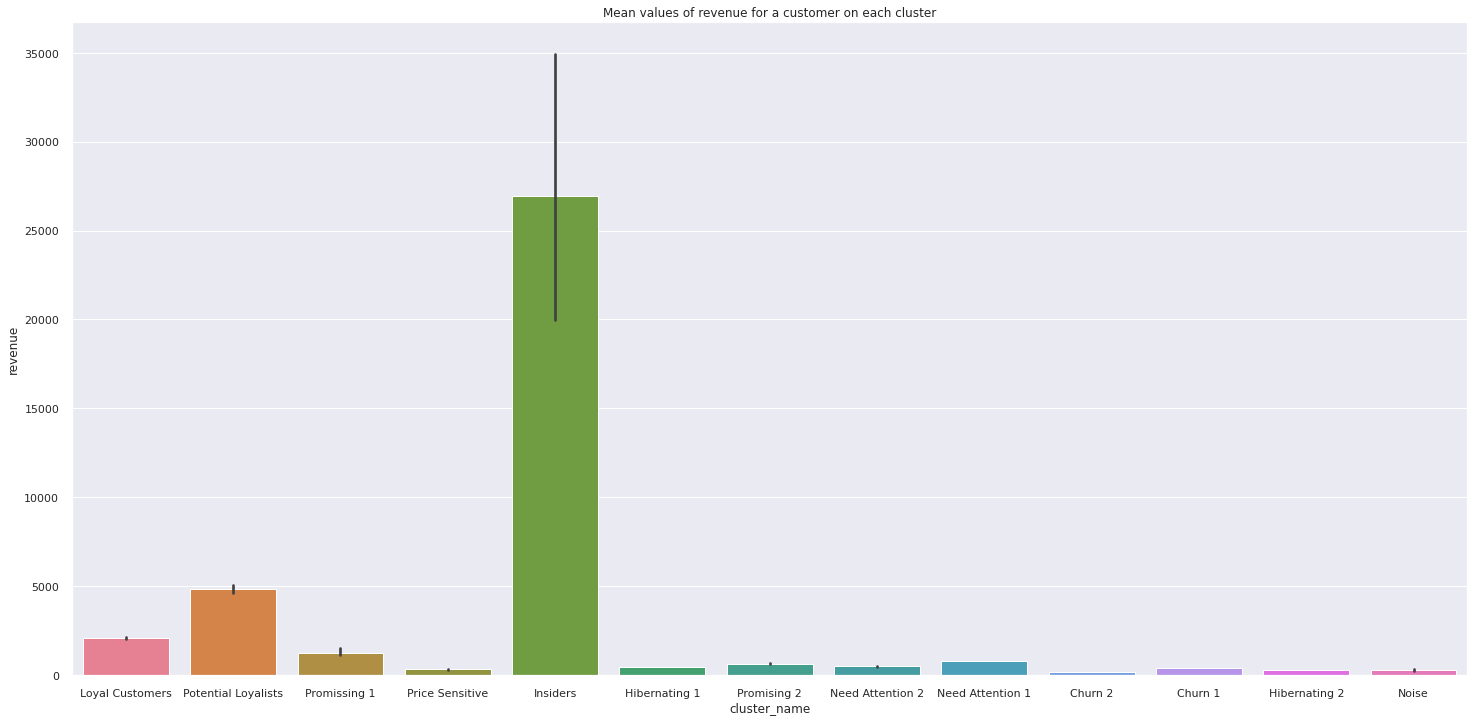

In [ ]:
sns.barplot(data = df_result, x = 'cluster_name', y = 'revenue', palette = 'husl');
plt.title('Mean values of revenue for a customer on each cluster');

### H5 - Customers from Insiders Program buy 2 times more products in quantity than the average customer
**False** The average Insider Customer buys 14x more items than the average customer

Customers from Insiders Cluster buy 14.22 x more items than the average customer


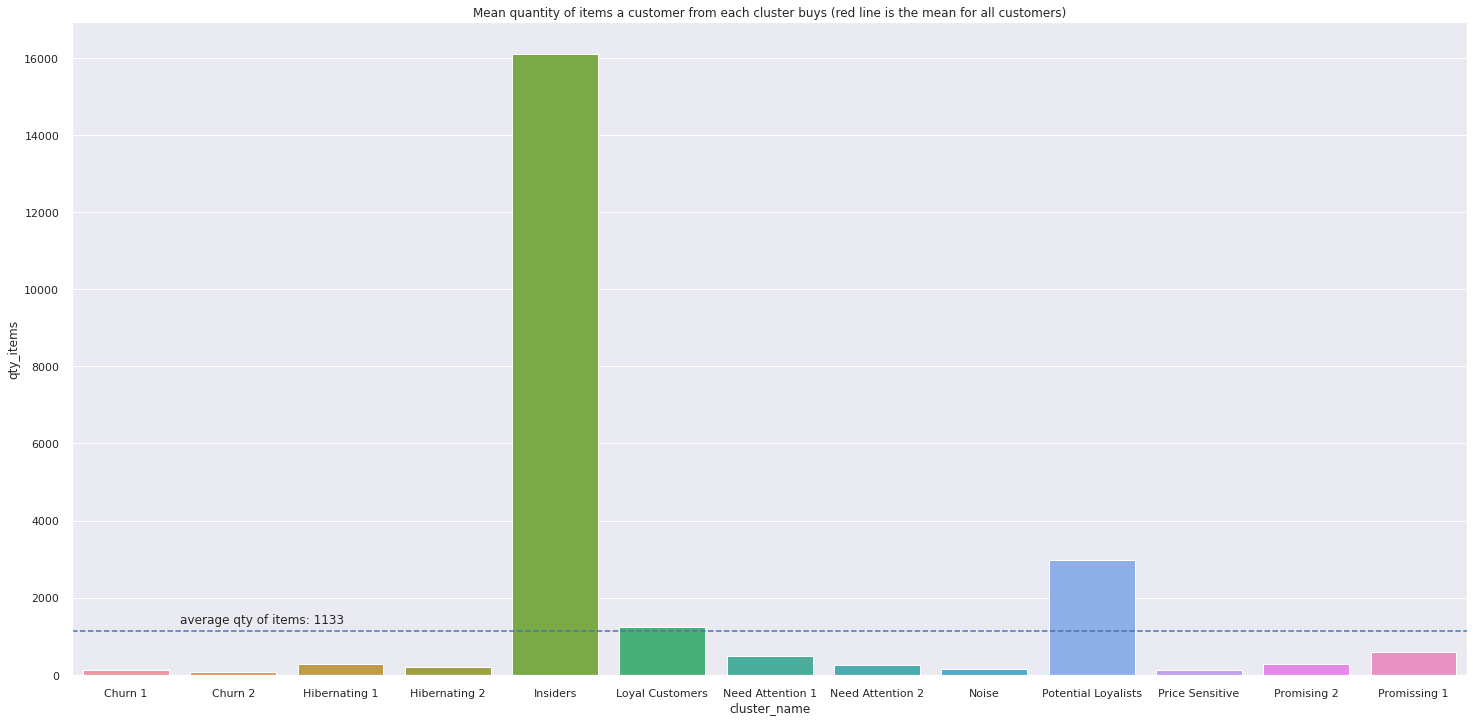

In [ ]:
avg_cust_mean = df_result['qty_items'].mean()

# mean of qty by cluster
qty_by_clust = df_result[['cluster_name','qty_items']].groupby(['cluster_name']).mean().reset_index()
ins_cust_mean = qty_by_clust.loc[qty_by_clust['cluster_name'] == 'Insiders']['qty_items']

print( 'Customers from Insiders Cluster buy {:,.2f} x more items than the average customer'.format( float(ins_cust_mean/avg_cust_mean)) )

sns.barplot(data = qty_by_clust, x = 'cluster_name', y = 'qty_items');
plt.title('Mean quantity of items a customer from each cluster buys (red line is the mean for all customers)')
plt.text( 0.5,  avg_cust_mean + 200, 'average qty of items: {:.0f}'.format(avg_cust_mean)  )
plt.axhline(y = avg_cust_mean, color = 'b', linestyle = '--' );

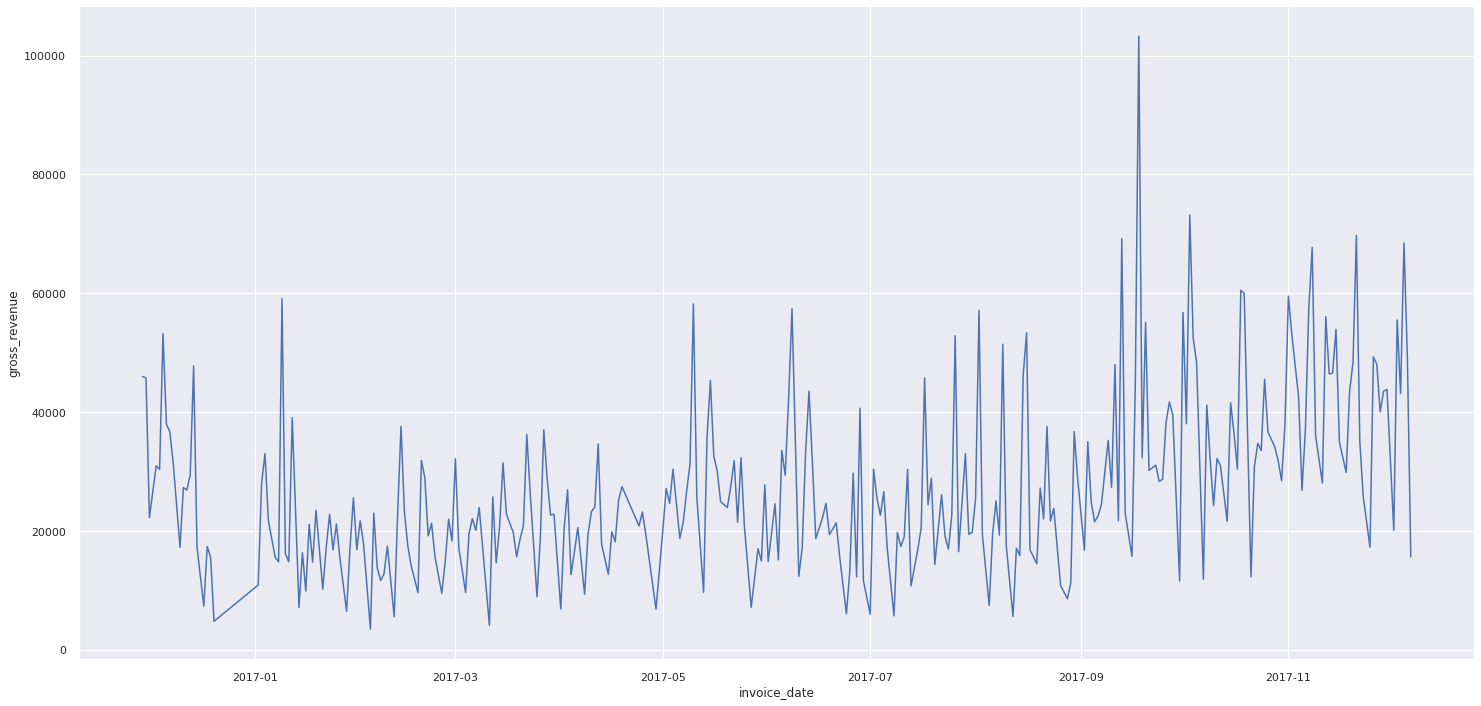

In [ ]:
# revenue over time (for consultation)
df_date = df3.copy()
df_date['gross_revenue'] = df_date['quantity'] * df_date['unit_price']
df_date = df_date.groupby('invoice_date').sum().reset_index()
df_date.head()

sns.lineplot(data = df_date, x = 'invoice_date', y = 'gross_revenue');

## 10.3. Business Questions

### 10.3.1. How many customers will be part of the group?


In [ ]:
result[result['cluster_name'] == 'Insiders'][['num_of_customers', 'perc_of_customer']]

,num_of_customers,perc_of_customer
6,122,2.828658


### 10.3.2. What are the main characteristics of these customers?

In [ ]:
result.columns

Index(['cluster', 'embedding_x', 'embedding_y', 'customer_id', 'recency',
       'avg_days_bw_purchases', 'num_purchases', 'tenure', 'frequency',
       'revenue', 'avg_ticket', 'qty_items', 'avg_basket_size',
       'avg_unique_prods', 'returns_revenue', 'avg_return_revenue',
       'num_returns', 'qty_returned', 'num_of_customers', 'perc_of_customer',
       'cluster_name'],
      dtype='object')

In [ ]:
result[result['cluster_name'] == 'Insiders'][['revenue', 'avg_ticket', 'qty_items', 'avg_basket_size', 'avg_unique_prods', 'num_purchases', 'tenure', 'qty_returned']].style.format("{:,.2f}")

,revenue,avg_ticket,qty_items,avg_basket_size,avg_unique_prods,num_purchases,tenure,qty_returned
6,"26,097.28","1,041.49","15,673.31",609.64,19.44,28.08,316.57,-528.30


### 10.3.3. What percentage of revenue contribution comes from Insiders?


In [ ]:
df_agg2 =  df_agg.copy()
df_agg2['perc_of_revenue'] = df_agg2['revenue'].apply(lambda x:  "{:.2f}%".format(x/df_agg2['revenue'].sum() * 100) )  
df_agg2.sort_values('revenue', ascending = False, inplace = True)
df_agg2.reset_index(inplace = True, drop = True)
df_agg2

,cluster_name,revenue,perc_of_revenue
0,Insiders,3284192.73,39.60%
1,Loyal Customers,1732121.49,20.88%
2,Potential Loyalists,1682745.25,20.29%
3,Promissing 1,479507.77,5.78%
4,Need Attention 1,448709.15,5.41%
5,Promising 2,116612.26,1.41%
6,Churn 1,111546.54,1.34%
7,Need Attention 2,110756.60,1.34%
8,Hibernating 1,109769.16,1.32%
9,Churn 2,98623.72,1.19%


### 10.3.4. What is the revenue expectation of this group for the coming months?


In [ ]:
# implement ARIMA, SARIMA or any regression method using sinusoidal decomposition

### 10.3.5. What are the conditions for a person to be eligible for Insiders?


In order to be invited for the Insiders Loyalty Program, I would suggest that a customer has to be above the 20 percentile in terms of:

**Revenue**, **Average Ticket** and/or **Quantity of Items Purchased** during a year or any other period.

In [ ]:
# selecting customers dataset
df_aux = df_result.copy()

df_aux.rename( columns = {'date_range' : 'tenure'}, inplace = True )
df_aux = df_aux.loc[df_aux['cluster_name'] == 'Insiders' ][['cluster_name','revenue', 'avg_ticket', 'qty_items', 'avg_basket_size', 'avg_unique_prods', 'num_purchases', 'tenure', 'qty_returned']]

# defining metrics from 20th percentile
df_aux[['cluster_name','revenue', 'avg_ticket', 'qty_items']].quantile(0.2)

revenue       8569.414000
avg_ticket     444.335273
qty_items     5664.200000
Name: 0.2, dtype: float64

In [ ]:
# df_result.loc[ (df_result['revenue'] > 8569)   & 
#                (df_result['avg_ticket'] > 444) & 
#                (df_result['qty_items'] > 5664)]

### 10.3.6. What are the conditions for a person to be removed from Insiders?


To be removed from the program, I would suggest that the customer has to go below the 20th percentile for those metrics

### 10.3.7. Are there any guarantees that the Insiders Program customers' have indeed higher value than the rest of the customer base?


Yes, all the data we have observed and the hypoteses we have tested so far indicat that these customers are indeed different from the rest of the base, since they purchase about 14x more items than the average customer and are responsible for about 40% of the revenue of the company.

### 10.3.8. What actions can the marketing team take to increase revenue?

The business levers I would suggest are the following:

| Cluster | Name | Action Plan  |
|-|-|-|
| 4 | Insiders | Keep engaged, offer concierge  |
| 1 | Potential Loyalists | Increase purchase frequency  |
| 0 | Loyal Customers | Increase average ticket  |
| 2 | Promissing 1 | Increase frequency  |
| 8 | Need Attention 1 | Decrease recency  |
| 6 | Promising 2 | Increase avg ticket  |
| 7 | Need Attention 2 | Increase avg ticket |
| 5 | Hibernating 1| Make them buy again |
| 10 | Churn 1 |Make them buy again |
| 3 | Price Sensitive | Increase avg ticket, Show more promos |
| -1 | Noise | Ignore |
| 9 | Churn 2 | Do nothing |

## 10.4. Possible Insights

Possible Insights:
- Type of product Insiders Program customers buy
- Top products Insiders Program customers buy
- Products bought together

# 11 Model Deployment

Here I compiled the actions performed for the deploy. It was an important experience because I was able to count on MySQL, AWS, heroku and metabase.

In [ ]:
#saving 
result_reduced.to_csv("result_reduced.csv")
df_res.to_csv("df_res.csv")
result.to_csv("result.csv")

In [ ]:
df_res = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Cluster/df_res.csv')

## 11.1. Inserting results on sqlite db

In [ ]:
#  connect to db
import sqlite3  
con = sqlite3.connect('insiders.db')

In [ ]:
#Connect to a database
con = sqlite3.connect('insiders.db')

#Create a cursor
cur = con.cursor()

#Create a table
cur.execute("""CREATE TABLE insiders (
    customer_id               INTEGER,
    country                   TEXT,
    recency                   INTEGER,
    avg_days_bw_purchases     REAL,
    num_purchases             INTEGER,
    tenure                    INTEGER,
    frequency                 REAL,
    revenue                   REAL,
    avg_ticket                REAL,
    qty_items                 INTEGER,
    avg_basket_size           REAL,
    avg_unique_prods          REAL,
    returns_revenue           REAL,
    avg_return_revenue        REAL,
    num_returns               REAL,
    qty_returned              REAL,
    embedding_x               REAL,
    embedding_y               REAL,
    cluster                   TEXT,
    cluster_name              TEXT

    )""")

#Commit or command
con.commit()

#Close our connection
con.close()


In [ ]:
df_res.dtypes

Unnamed: 0                 int64
embedding_x              float64
embedding_y              float64
cluster                  float64
customer_id              float64
country                   object
recency                  float64
avg_days_bw_purchases    float64
num_purchases            float64
date_range               float64
frequency                float64
revenue                  float64
avg_ticket               float64
qty_items                float64
avg_basket_size          float64
avg_unique_prods         float64
returns_revenue          float64
avg_return_revenue       float64
num_returns              float64
qty_returned             float64
dtype: object

In [ ]:
con.execute(
     """
     SELECT name
     FROM sqlite_schema
     WHERE type ='table'
     """
 )
 cur.execute(
 """SELECT 
         name
     FROM 
         sqlite_master
     WHERE 
         type ='table' 
         ;"""
         )
 con.commit()
  AND name NOT LIKE 'sqlite_%'
 cur.fetchone()

In [ ]:
# con.execute(
#     """
#     DROP TABLE insiders
#     """
# )
# con.commit()

# # con.close()


In [ ]:
# conn = create_engine('sqlite:/insiders.db', echo=False)
# df_res.to_sql('insiders', con = conn, if_exists='append', index = False)

In [ ]:
# df_sql = pd.read_sql('insiders', con = conn)
# print(df_sql.iloc[0,8])
# print(df_result.iloc[0,8])
# df_sql.head()

## 11.2 Inserting results to mysql db on AWS

In [ ]:
# adding last update time to data that will be inserted on DB

now = datetime.now().strftime( "%Y-%m-%d %H:%M:%S" )

df_result['last_update'] = now

In [ ]:
df_result.head()

,customer_id,country,recency,avg_days_bw_purchases,num_purchases,tenure,frequency,revenue,avg_ticket,qty_items,avg_basket_size,avg_unique_prods,returns_revenue,avg_return_revenue,num_returns,qty_returned,embedding_x,embedding_y,cluster,cluster_name,last_update
0,17850,United Kingdom,373,1.000000,34,1,34.000000,5288.63,155.547941,1693,48.371429,8.735294,-102.58,-6.838667,15.0,-40.0,-3.543982,9.718514,0,Loyal Customers,2022-03-21 11:10:03
1,13047,United Kingdom,57,52.833333,9,317,0.028391,3089.10,343.233333,1355,84.687500,19.000000,-143.49,-6.238696,23.0,-35.0,-4.025312,8.022521,0,Loyal Customers,2022-03-21 11:10:03
2,12583,France,3,26.500000,15,371,0.040431,6629.34,441.956000,4978,292.823529,15.466667,-76.04,-25.346667,3.0,-50.0,-3.534883,16.845985,1,Potential Loyalists,2022-03-21 11:10:03
3,13748,United Kingdom,96,92.666667,5,278,0.017986,948.25,189.650000,439,87.800000,5.600000,0.00,0.000000,0.0,0.0,-6.975824,-4.942078,2,Promissing 1,2022-03-21 11:10:03
4,15100,United Kingdom,334,20.000000,3,40,0.075000,635.10,211.700000,58,9.666667,1.000000,-240.90,-80.300000,3.0,-22.0,19.139286,-2.679391,3,Price Sensitive,2022-03-21 11:10:03


In [ ]:
# # reading credentials

# secrets_json = open('../secrets.json')
# secrets = json.load(secrets_json)

# dialect =   secrets["dialect"]
# driver =    secrets["driver"]
# host =      secrets["host"]
# username =  secrets["username"]
# password =  secrets["password"]
# port =      secrets["port"]
# database =  secrets["database"]

# url = "{}+{}://{}:{}@{}:{}/{}".format(dialect, driver, username, password, host, port, database)

# engine = create_engine(url = url, echo = True) #, pool_pre_ping = True

In [ ]:
# read_query = """
#     SELECT * FROM insiders i
# """
# # engine.execute
# df_sql = pd.read_sql_query(read_query, con = engine)

In [ ]:
# if we had to create table manually we could use this
# create_table = """
#     CREATE TABLE insiders (
#     customer_id               INTEGER,
#     country                   TEXT,
#     recency                   INTEGER,
#     avg_days_bw_purchases     REAL,
#     num_purchases             INTEGER,
#     tenure                    INTEGER,
#     frequency                 REAL,
#     revenue                   REAL,
#     avg_ticket                REAL,
#     qty_items                 INTEGER,
#     avg_basket_size           REAL,
#     avg_unique_prods          REAL,
#     returns_revenue           REAL,
#     avg_return_revenue        REAL,
#     num_returns               REAL,
#     qty_returned              REAL,
#     embedding_x               REAL,
#     embedding_y               REAL,
#     cluster                   TEXT,
#     cluster_name              TEXT
#     )
# """

In [ ]:
# inserting data
# df_result.to_sql('insiders', con = engine, if_exists='replace', index = False )

In [ ]:
# drop_table_query = """
#     DROP TABLE insiders
# """
# engine.execute(drop_table_query)


## 11.3 Inserting results to mysql db on heroku

In [ ]:
# adding last update time to data that will be inserted on DB

now = datetime.now().strftime( "%Y-%m-%d %H:%M:%S" )

df_result['last_update'] = now
df_result.head()

,customer_id,country,recency,avg_days_bw_purchases,num_purchases,tenure,frequency,revenue,avg_ticket,qty_items,avg_basket_size,avg_unique_prods,returns_revenue,avg_return_revenue,num_returns,qty_returned,embedding_x,embedding_y,cluster,cluster_name,last_update
0,17850,United Kingdom,373,1.000000,34,1,34.000000,5288.63,155.547941,1693,48.371429,8.735294,-102.58,-6.838667,15.0,-40.0,-3.543982,9.718514,0,Loyal Customers,2022-03-21 11:10:07
1,13047,United Kingdom,57,52.833333,9,317,0.028391,3089.10,343.233333,1355,84.687500,19.000000,-143.49,-6.238696,23.0,-35.0,-4.025312,8.022521,0,Loyal Customers,2022-03-21 11:10:07
2,12583,France,3,26.500000,15,371,0.040431,6629.34,441.956000,4978,292.823529,15.466667,-76.04,-25.346667,3.0,-50.0,-3.534883,16.845985,1,Potential Loyalists,2022-03-21 11:10:07
3,13748,United Kingdom,96,92.666667,5,278,0.017986,948.25,189.650000,439,87.800000,5.600000,0.00,0.000000,0.0,0.0,-6.975824,-4.942078,2,Promissing 1,2022-03-21 11:10:07
4,15100,United Kingdom,334,20.000000,3,40,0.075000,635.10,211.700000,58,9.666667,1.000000,-240.90,-80.300000,3.0,-22.0,19.139286,-2.679391,3,Price Sensitive,2022-03-21 11:10:07


In [ ]:
# reading credentials

# aws credentiasl
path_aws_secrets = '/home/ubuntu/project/Insiders-Loyalty-Program/src/secrets/'
secrets_json = open( path_aws_secrets + 'secrets-heroku.json')

# local credentiasl
# secrets_json = open( '../secrets/secrets-heroku.json')

secrets = json.load(secrets_json)

dialect =   secrets["dialect"]
driver =    secrets["driver"]
host =      secrets["host"]
username =  secrets["username"]
password =  secrets["password"]
port =      secrets["port"]
database =  secrets["database"]

url = "{}+{}://{}:{}@{}:{}/{}".format(dialect, driver, username, password, host, port, database)

url 

dbschema = 'public'

# connecting to db
engine = create_engine(url = url, echo = True, connect_args={'options': '-csearch_path={}'.format(dbschema)} ) #, pool_pre_ping = True
conn = engine.connect()

2022-03-21 11:49:56,829 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2022-03-21 11:49:56,832 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-21 11:49:57,156 INFO sqlalchemy.engine.Engine select current_schema()
2022-03-21 11:49:57,158 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-21 11:49:57,480 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2022-03-21 11:49:57,481 INFO sqlalchemy.engine.Engine [raw sql] {}


In [ ]:
# import os
# os.environ['DATABASE_URL']

In [ ]:
df_result.to_sql('insiders_result', con = engine, if_exists='replace', index = False )

# if we have precision problems we can use:
# from sqlalchemy.dialects.postgresql import DOUBLE_PRECISION
# dtypes = {'avg_days_bw_purchases' : DOUBLE_PRECISION}
# df_result.to_sql('insiders_result', con = engine, if_exists='replace', index = False, dtype = dtypes )

In [ ]:
query = """
    SELECT *
    FROM insiders_result
"""

df_sql = pd.read_sql_query(query, con = engine)

2022-03-21 11:50:36,071 INFO sqlalchemy.engine.Engine 
    SELECT *
    FROM insiders_result

2022-03-21 11:50:36,084 INFO sqlalchemy.engine.Engine [raw sql] {}


In [ ]:
# closing the connection
conn.invalidate()
engine.dispose()

In [ ]:
sns.scatterplot( data = df_sql, x = 'embedding_x', y = 'embedding_y', hue = 'cluster_name', palette = 'husl');

In [ ]:
sns.scatterplot( data = df_result, x = 'embedding_x', y = 'embedding_y', hue = 'cluster_name', palette = 'husl');

### Dashboard deployed at: [Insiders Program Clustering - Metabase](https://insiders-project-metabase.herokuapp.com/public/dashboard/1b6ee0b6-54ad-480d-84e0-48db2d6c5637)

TO DO:
- verify aws packages (OK)
- make a visualization dashboard (OK)
- automate reports with:
    - crontab (OK)
    - github actions
- automate ec2 to turn on and off